In [94]:
import networkx as nx
import powerlaw as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter 

In [95]:
G = nx.read_edgelist('wiki-Vote.txt\Wiki-Vote.txt', create_using=nx.DiGraph)

In [96]:
print(G)
G.in_degree()

DiGraph with 7115 nodes and 103689 edges


InDegreeView({'30': 23, '1412': 29, '3352': 264, '5254': 265, '5543': 145, '7478': 92, '3': 31, '28': 122, '39': 28, '54': 40, '108': 11, '152': 51, '178': 35, '182': 32, '214': 175, '271': 192, '286': 19, '300': 22, '348': 35, '349': 15, '371': 24, '567': 26, '581': 12, '584': 14, '586': 10, '590': 32, '604': 13, '611': 25, '8283': 10, '25': 0, '6': 20, '8': 44, '19': 22, '23': 22, '29': 41, '33': 34, '35': 110, '50': 32, '55': 67, '75': 69, '80': 43, '86': 108, '94': 27, '127': 19, '154': 18, '192': 27, '224': 18, '226': 21, '246': 23, '252': 38, '255': 26, '257': 25, '261': 24, '273': 13, '280': 22, '282': 101, '299': 158, '302': 24, '306': 22, '308': 41, '310': 43, '322': 43, '325': 45, '339': 20, '356': 43, '358': 12, '363': 18, '370': 45, '373': 20, '377': 28, '379': 21, '407': 135, '415': 66, '422': 16, '428': 22, '439': 70, '488': 22, '514': 20, '545': 49, '549': 62, '560': 40, '592': 17, '600': 77, '645': 8, '650': 14, '659': 44, '664': 26, '667': 35, '673': 42, '675': 25, '69

In [97]:
def generate_ccdf_in(G):
   dd = Counter(dict(G.in_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

In [98]:
def logscatter_in(G):
    d = dict(G.in_degree)
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()


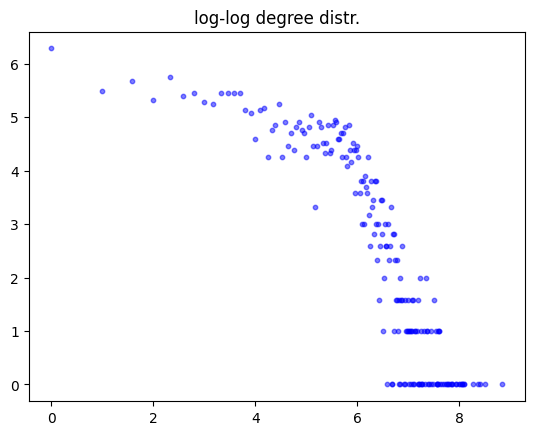

In [99]:
logscatter_in(G)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.9097 x ^ -4.4276 (k_min = 26)


C:\Users\User\AppData\Local\Temp\ipykernel_16256\3510536466.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


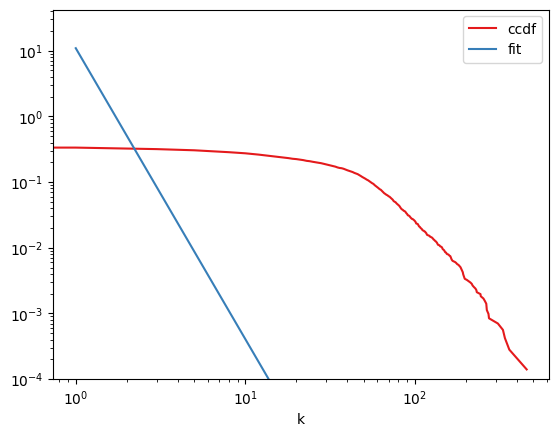

In [100]:
generate_ccdf_in(G)

In [101]:
def generate_ccdf_out(G):
   dd = Counter(dict(G.out_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   
   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

def logscatter_out(G):
    d = dict(G.out_degree())
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.5675 x ^ -2.7601 (k_min = 28)


C:\Users\User\AppData\Local\Temp\ipykernel_16256\650853813.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


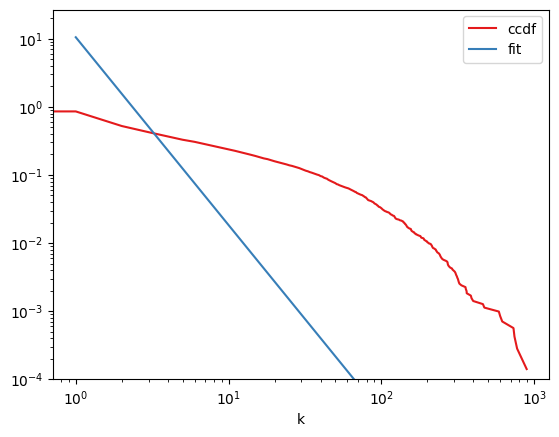

In [102]:
generate_ccdf_out(G)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


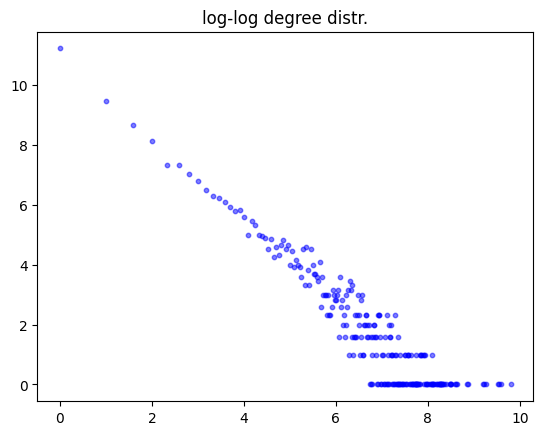

In [103]:
logscatter_out(G)

In [104]:
#Clustering coefficient
cc = nx.transitivity(G)
print(f"CC for real network: {cc}")

CC for real network: 0.05285122817867548


In [105]:
def p(Graph):
    return len(Graph.edges) / ((len(Graph.nodes) * (len(Graph.nodes)-1)) / 2)

print("The parameter p for the graph: ", p(G))

The parameter p for the graph:  0.004097075022161917


In [2]:
print("Hello :)")

Hello :)
